In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━━━━━━━━╸━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s

Question 3: Use yfinance to Extract Stock Data

In [8]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [3]:
gme = yf.Ticker("GME")

Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to max so we get information for the maximum amount of time.

In [4]:
gme_data = gme.history(period = 'max')

Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.

In [6]:
gme_data.reset_index(inplace = True)
gme_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,1,2002-02-14,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,3,2002-02-19,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [10]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [11]:
soup = BeautifulSoup(html_data, "html.parser")

In [13]:
gme_revenue = pd.DataFrame(columns=['Date','Revenue']) 
for row in soup.find_all('tbody')[1].find_all('tr'):
    col = row.find_all('td')
    Date = col[0].text
    Revenue = col[1].text
    gme_revenue = gme_revenue.append({'Date': Date, 'Revenue': Revenue}, ignore_index=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [14]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


Question 6: Plot GameStop Stock Graph

Define Graphing Function

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [20]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop').

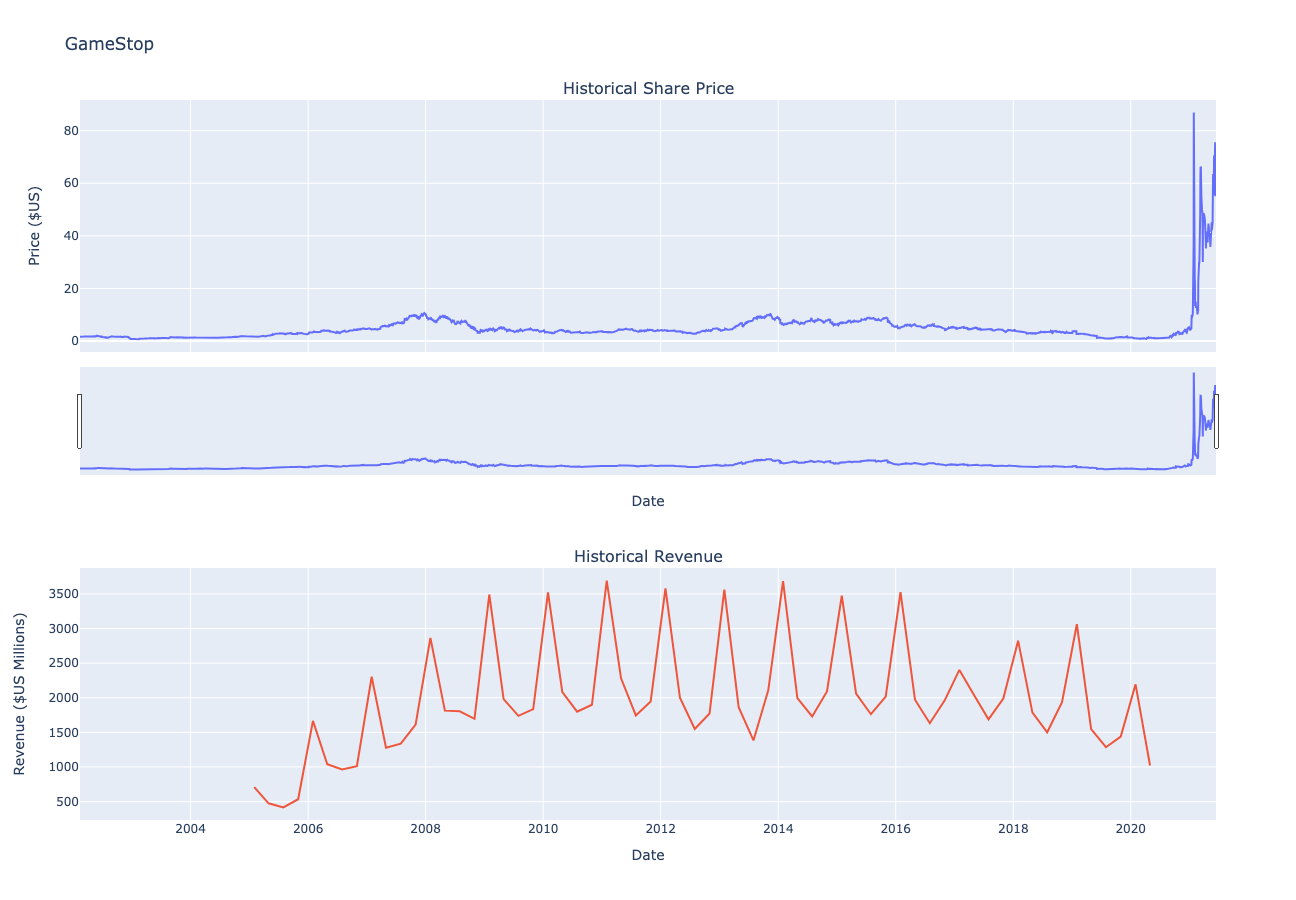

In [21]:
make_graph(gme_data, gme_revenue, 'GameStop')